In [1]:
import lorm
from nfft import nfft
import disc.energy_curveling_2d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sampleCircle(num):
    t = np.linspace(0,2*np.pi,num,endpoint=False)
    coords = np.zeros([num,2])
    coords[:,1] = np.cos(t)
    coords[:,0] = np.sin(t)
    return coords

In [3]:
mu = np.load("data/dog_line.npy")
mu_m = mu.shape[0]

In [4]:
#mu_m = 400
#mu = 0.4*sampleCircle(mu_m) + 0.1*(np.random.rand(mu_m,2)-0.5)
#mu = np.random.rand(mu_m,2)-0.5
#mu_m = 4
#mu = 0.3*np.array([[-1,-1],[-1,1],[1,-1],[1,1]])

mu_N_half = 64
nfft2d = nfft.NFFT2D(mu_m,2*mu_N_half,2*mu_N_half)
nfft2d.x = mu
nfft2d.precompute_x()
nfft2d.f = np.ones(mu_m,dtype=complex)/mu_m
nfft2d.adjoint()
mu_hat = np.zeros([2*mu_N_half,2*mu_N_half],dtype=complex)
mu_hat[:] = nfft2d.f_hat/nfft2d.f_hat[mu_N_half,mu_N_half]

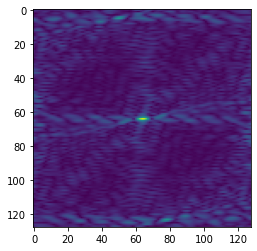

In [5]:
%matplotlib inline
plt.imshow(np.abs(mu_hat))

In [6]:
e2 = lorm.manif.EuclideanSpace(2)
points = lorm.manif.ManifoldPointArray(e2)
points.coords = 0.4*sampleCircle(mu_m)

In [7]:
N_half = 32
N=2*N_half
m = points.coords.shape[0]
energy = disc.energy_curveling_2d.plan(m,N,0.1,2, closed=True)
if mu_N_half >= N_half:
    energy._mu_hat[:] = mu_hat[mu_N_half-N_half:mu_N_half+N_half,mu_N_half-N_half:mu_N_half+N_half]
else:
    energy._mu_hat[N_half-mu_N_half:N_half+mu_N_half,N_half-mu_N_half:N_half+mu_N_half] = mu_hat[:]

<IPython.core.display.Javascript object>


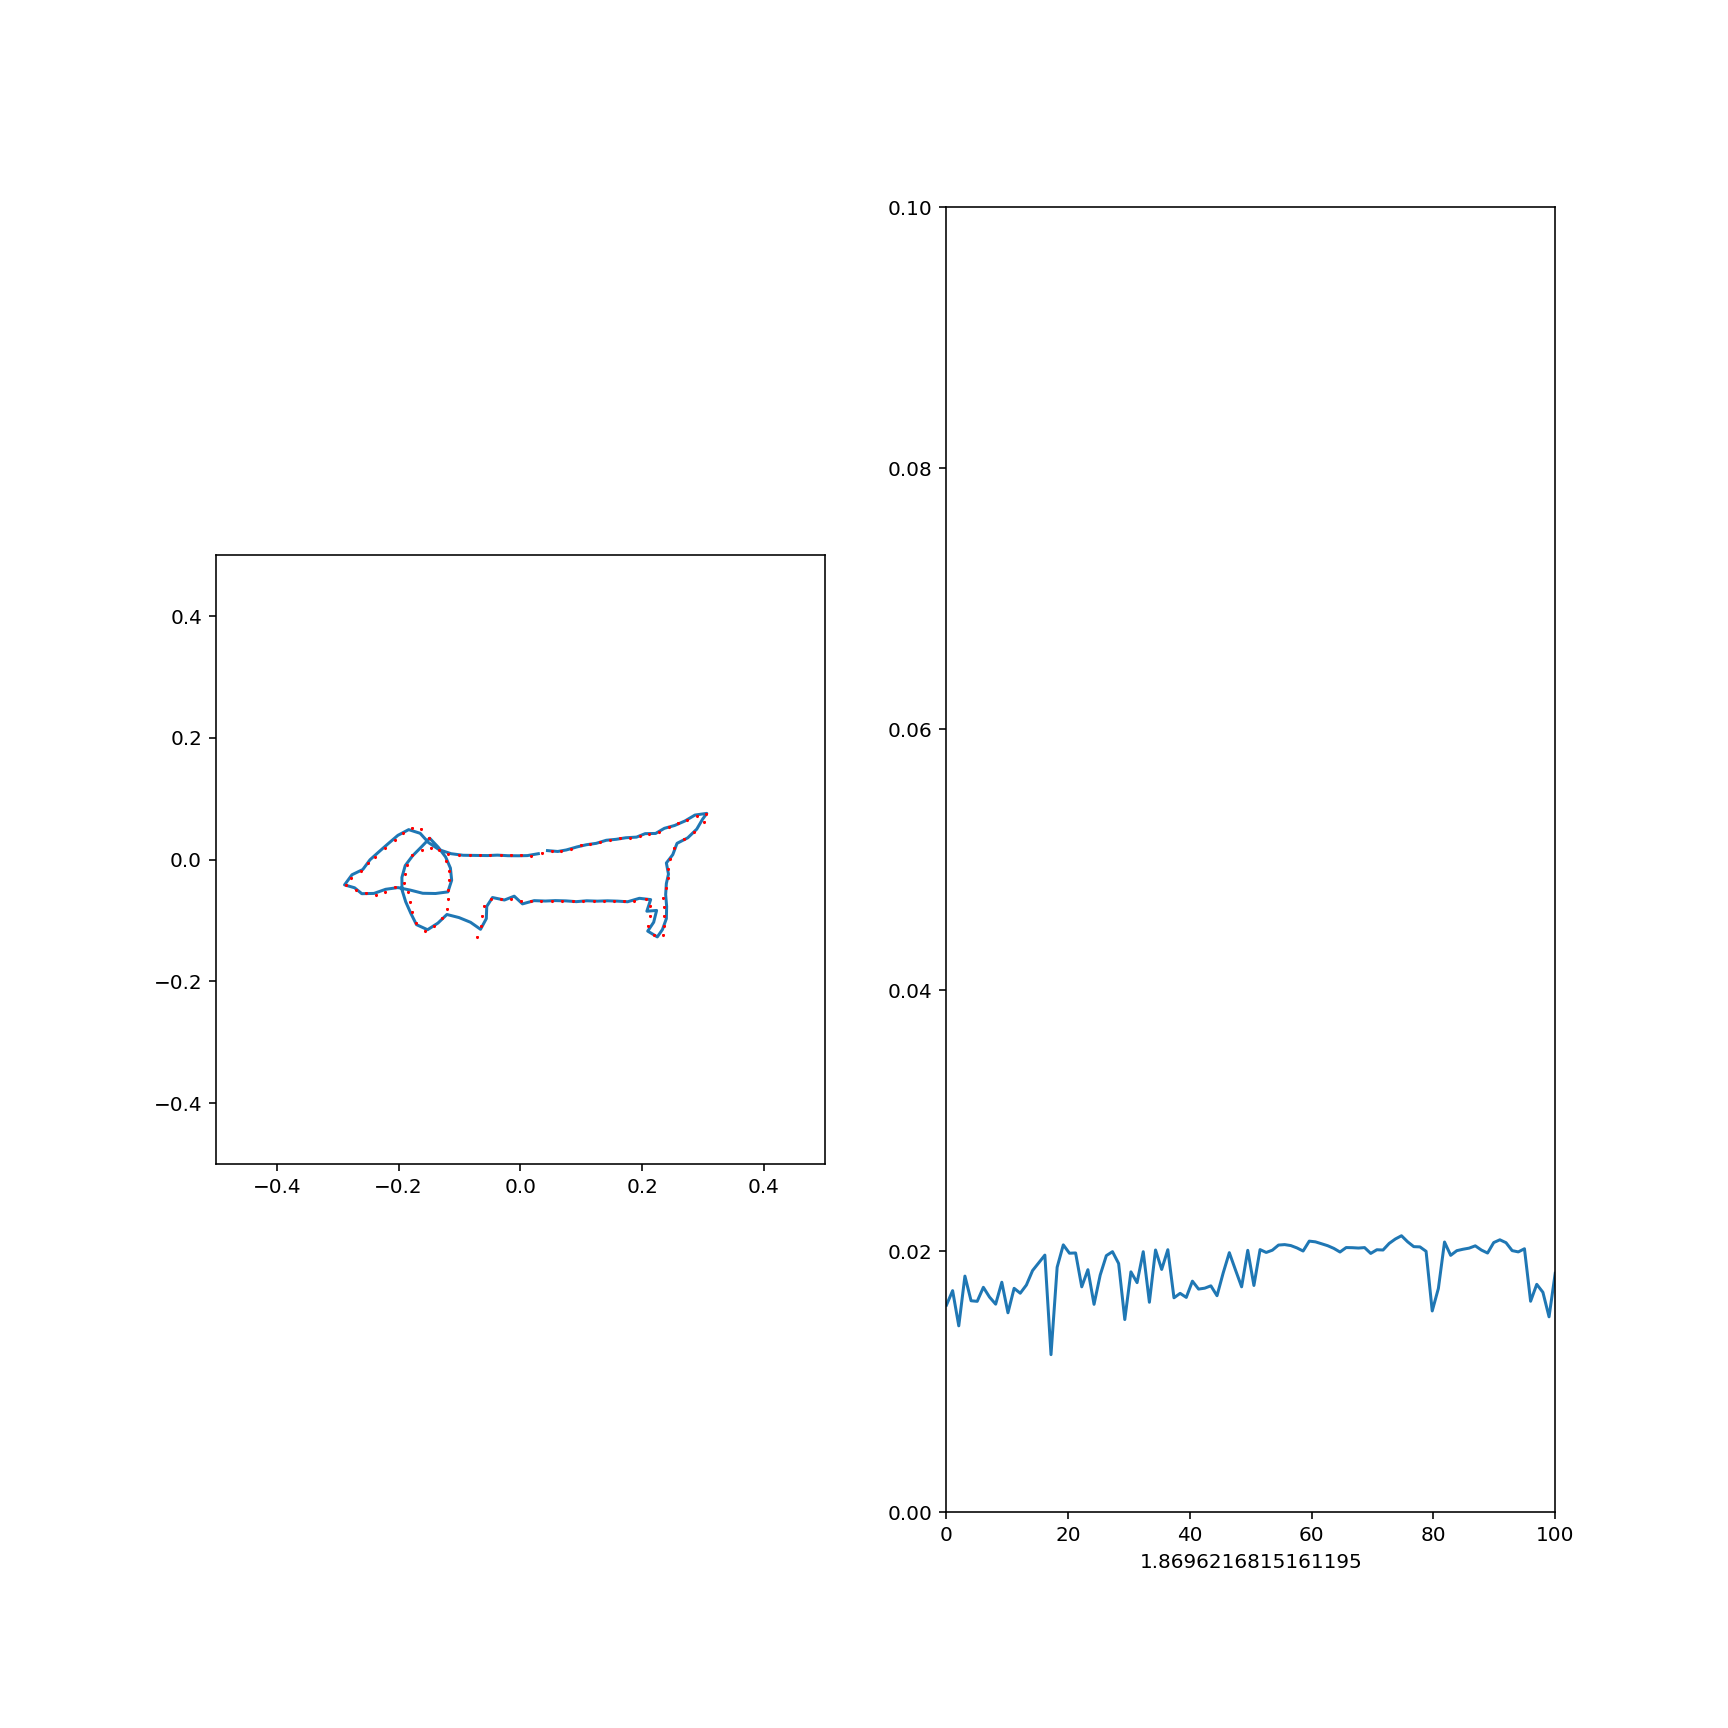

In [8]:
%matplotlib notebook
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(121)
#ax.axis(np.array([-0.28,-0.26,0.26,0.28]))
#ax.axis(np.array([0.21,0.24,-0.44,-0.42]))
ax.axis(np.array([-0.5,0.5,-0.5,0.5]))
ax.axes.set_aspect(1)
line = plt.Line2D(points.coords[:,0],points.coords[:,1])#,marker='*',markersize=2)
line_mu = plt.Line2D(mu[:,0],mu[:,1],marker='*',markersize=1,linewidth=0,color='red')
ax.add_line(line)
ax.add_line(line_mu)

bx = fig.add_subplot(122)
#bx.axis(np.array([900,950,0.0045,0.0015]))
bx.axis(np.array([0,m,0.000,1/np.sqrt(m)]))
bx.set_xlabel(np.sum(energy._eval_lengths(points.coords)))
distance = plt.Line2D(np.linspace(0,m,m),energy._eval_lengths(points.coords))
bx.add_line(distance)
def update_points(p):
    line.set_xdata(p.coords[:,0])
    line.set_ydata(p.coords[:,1])
    distance.set_ydata(energy._eval_lengths(p.coords))
    bx.set_xlabel(np.sum(energy._eval_lengths(p.coords)))
    fig.canvas.draw()
    return


In [13]:
method= lorm.optim.ConjugateGradientMethod(max_iter=50,tol_grad=1e-12)
method.listener = update_points
for i in range(1):
    points = method.run(energy,points)

Initial value: f[0] = 0.001440712323228798
f[1] = 0.0014383670935089255
f[2] = 0.001436187362954996
f[3] = 0.0014322510135764985
f[4] = 0.001428845551947063
f[5] = 0.0014261269651043278
f[6] = 0.0014240429724690108
f[7] = 0.0014222287217152444
f[8] = 0.0014197081513323202
f[9] = 0.0014144850339631652
f[10] = 0.001406474130991302
f[11] = 0.0013997547602695036
f[12] = 0.0013948204087506702
f[13] = 0.0013877652387905529
f[14] = 0.0013835638964577164
f[15] = 0.0013775979799965988
f[16] = 0.0013742999017445786
f[17] = 0.0013710251974776886
f[18] = 0.001368517092182145
f[19] = 0.0013659435739132144
f[20] = 0.001363444699136671
f[21] = 0.001361332542880172
f[22] = 0.0013578803099519325
f[23] = 0.0013548624889145014
f[24] = 0.0013523864779303265
f[25] = 0.0013494161271119533
f[26] = 0.001345163976220918
f[27] = 0.0013391348028226162
f[28] = 0.0013352640384171107
f[29] = 0.0013313025981220017
f[30] = 0.0013271882522917406
f[31] = 0.00132211421478532
f[32] = 0.001317647467058834
f[33] = 0.001313

In [129]:
#points_new.coords = temp
tempc = points.coords
m2 = len(tempc)
temp = np.zeros([2*m2,2])
for i in range(m2):
    temp[2*i,:] = tempc[i,:]
for i in range(m2-1):
    temp[2*i+1,:] = (tempc[i,:]+tempc[i+1,:])/2
temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2

m = len(temp)
points.coords = temp

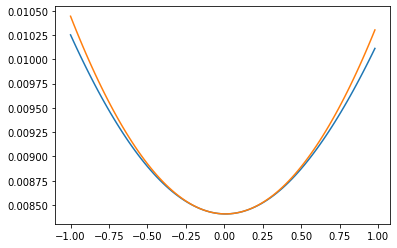

In [60]:
# test the quatradic approximation obtain from the gradient and the Hessian
%matplotlib inline
v=energy.grad(points)
v.coords = 0.001*np.random.randn(m,2)
f,q, s = lorm.utils.eval_objective_function_with_quadratic_approximation(energy,v)
plt.plot(s,f,s,q)

In [64]:
plt.show()